In [6]:
#Library Section
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from collections import Counter
from sklearn import model_selection
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.learning_curve import learning_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

In [7]:
def plot_roc_curve(model, x_test, y_test):
    y_score=model.predict_proba(x_test)[:,1]

    fpr, tpr,_ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    # Plotting our Baseline..
    plt.plot([0,1],[0,1])
    plt.plot(fpr,tpr,color='green')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve (AUC = ' + str(roc_auc)+ ')')

In [8]:
got_df = pd.read_csv('csv/SQL_GOT_data.csv')
total = len(got_df)
total

2011

In [9]:
deads6_list = ['Grenn', 'Janos Slynt', 'Doreah', 'Mace Tyrell', 'Brynden Tully', 'Xaro Xhoan Daxos', 'Kevan Lannister']
got_df['isdead_shw'][got_df['name_x'].isin(deads6_list)] = 1

alive_list = ['Cersei Lannister', 'Tyrion Lannister', 'Daenerys Targaryen', 'Arya Stark', 'Jorah Mormont', 
              #'Jon Snow', 'Brienne of Tarth', 'Bronn', #Estos registros sí cambiaron en S7
              'Sansa Stark', 'Jaime Lannister', 'Samwell Tarly', 'Sandor Clegane', 'Varys', 'Brandon Stark',
              'Theon Greyjoy', 'Podrick Payne', 'Missandei', 'Eddison Tollett', 'Grey Worm', 'Gendry', 'Davos Seaworth',
              'Melisandre', 'Gilly', 'Meera Reed', 'Daario Naharis', 'Hot Pie', 'Gregor Clegane', 'Qyburn', 'Anguy', 
              "Jaqen H'ghar", 'Ellaria Sand', 'Brynden Tully', 'Beric Dondarrion', 'Xaro Xhoan Daxos', 'Salladhor Saan']
got_df = got_df[got_df['name_x'].isin(alive_list)==False]
len(got_df)

C:\Users\mramirbe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1979

In [15]:
y = got_df['isdead_shw']
x = got_df[['isdead_bk', 'ismale', 'book1', 'book2', 'book3', 'book4', 'book5',
            #'isalivemother_bk', 'isalivefather_bk', 'isaliveheir_bk','isalivespouse_bk', 'ismarried_bk', 
            'isnoble_bk', 'booldeadrelations_bk', 'ispopular_bk', #'death_bk', 'apperance_chp',
            #'hasmom_bk', 'hasdad_bk', 'hasheir_bk', 'hasspouse_bk', 
            'age_bk', 'numdeadrelations_bk', 'popularity_bk', 
            #'culture_bk', 'house_bk', 'name_y', 'isdead_shw', 'death_season', 
            'time_s1', 'time_s2', 'time_s3', 'time_s4', #'total_episode_num', 
            'season1', 'season2', 'season3', 'season4', 'age_shw', #'house_shw', 'match_name',
            #'sum_rating', 'total_viewers',
            'culture_bk[T.Astap]', 'culture_bk[T.Braav]', 'culture_bk[T.Crann]', 'culture_bk[T.Dorni]', 
            'culture_bk[T.Dothr]', 'culture_bk[T.Free ]', 'culture_bk[T.Ghisc]', 'culture_bk[T.Ironb]', 
            'culture_bk[T.Ironm]', 'culture_bk[T.Lhaza]', 'culture_bk[T.Lysen]', 'culture_bk[T.Myris]', 
            'culture_bk[T.Naath]', 'culture_bk[T.None]', 'culture_bk[T.North]', 'culture_bk[T.Pento]', 
            'culture_bk[T.Qarth]', 'culture_bk[T.Reach]', 'culture_bk[T.River]', 'culture_bk[T.Storm]', 
            'culture_bk[T.The R]', 'culture_bk[T.Tyros]', 'culture_bk[T.Valem]', 'culture_bk[T.Valyr]', 
            'culture_bk[T.Weste]', 'culture_bk[T.Wildl]',
            'house_bk[T.BROTHERHOOD WITHOUT BANNERS]', 'house_bk[T.HOUSE ARRYN]', 'house_bk[T.HOUSE BAELISH]', 
            'house_bk[T.HOUSE BARATHEON]', 'house_bk[T.HOUSE BOLTON]', 'house_bk[T.HOUSE CLEGANE]', 
            'house_bk[T.HOUSE FREY]', 'house_bk[T.HOUSE GREYJOY]', 'house_bk[T.HOUSE LANNISTER]', 
            'house_bk[T.HOUSE MARTELL]', 'house_bk[T.HOUSE STARK]', 'house_bk[T.HOUSE TARGARYEN]', 
            'house_bk[T.HOUSE TULLY]', 'house_bk[T.HOUSE TYRELL]', 'house_bk[T.NIGHTS WATCH]', 'house_bk[T.OTHER]', 
            'house_bk[T.UNKNOWN]', 'house_shw[T.House Bolton]', 'house_shw[T.House Greyjoy]', 
            'house_shw[T.House Lannister]', 'house_shw[T.House Stark]', 'house_shw[T.House Targaryen]', 
            'house_shw[T.None]', 'house_shw[T.Nights Watch]']]

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.30, random_state=4444, stratify=y)
print('Original dataset train {}'.format(Counter(y_train)))
print('Original dataset test {}'.format(Counter(y_test)))

Original dataset train Counter({0.0: 1336, 1.0: 49})
Original dataset test Counter({0.0: 573, 1.0: 21})


In [36]:
import eli5
from eli5.sklearn import PermutationImportance

# Make a small change to the code below to use in this problem. 
perm = PermutationImportance(log_model, random_state=1).fit(x_test, y_test)

In [41]:
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

Weight,Feature
0.0138 ± 0.0058,book4
0.0135 ± 0.0043,age_bk
0.0067 ± 0.0021,season2
0.0057 ± 0.0087,isnoble_bk
0.0057 ± 0.0046,booldeadrelations_bk
0.0057 ± 0.0027,season3
0.0047 ± 0.0013,book1
0.0044 ± 0.0016,house_bk[T.HOUSE GREYJOY]
0.0044 ± 0.0034,culture_bk[T.Valem]
0.0040 ± 0.0016,house_shw[T.House Stark]


In [46]:
#Los modelos finalmente elkegidos fueron
#inner_reglog
#left_balanced
#left_balanced_cht
#left_svm_rbf_cht
#left_forest_cht

with open("models/inner_reglog.pkl","rb") as f:
        log_model = pickle.load(f)
        log_model.coef_list = sorted(zip(x.columns, log_model.coef_[0]), key=lambda tup: tup[1], reverse=True)
        
with open("models/left_balanced.pkl","rb") as f:
        bal_model = pickle.load(f)
        bal_model.coef_list = sorted(zip(x.columns, bal_model.coef_[0]), key=lambda tup: tup[1], reverse=True)
        
with open("models/left_balanced_cht.pkl","rb") as f:
        bk_bal_model_cht = pickle.load(f)
        bk_bal_model_cht.coef_list = sorted(zip(x.columns, bk_bal_model_cht.coef_[0]), key=lambda tup: tup[1], reverse=True) 
        
with open("models/left_forest_cht.pkl","rb") as f:
        bk_forest_model_cht = pickle.load(f)
        bk_forest_model_cht.coef_list = sorted(zip(x.columns, bk_forest_model_cht.feature_importances_), key=lambda tup: tup[1], reverse=True)
        
with open("models/left_svm_rbf_cht.pkl","rb") as f:
        bk_rbf_model_cht = pickle.load(f)
        #bk_rbf_model_cht.coef_list = sorted(zip(x.columns, bk_rbf_model_cht.feature_importances_), key=lambda tup: tup[1], reverse=True)
        perm = PermutationImportance(bk_rbf_model_cht, random_state=1).fit(x_test, y_test)
        bk_rbf_model_cht.coef_list = sorted(zip(x.columns, perm.feature_importances_*100), key=lambda tup: tup[1], reverse=True)

In [95]:
models=[bal_model, bk_bal_model_cht, bk_forest_model_cht, log_model]

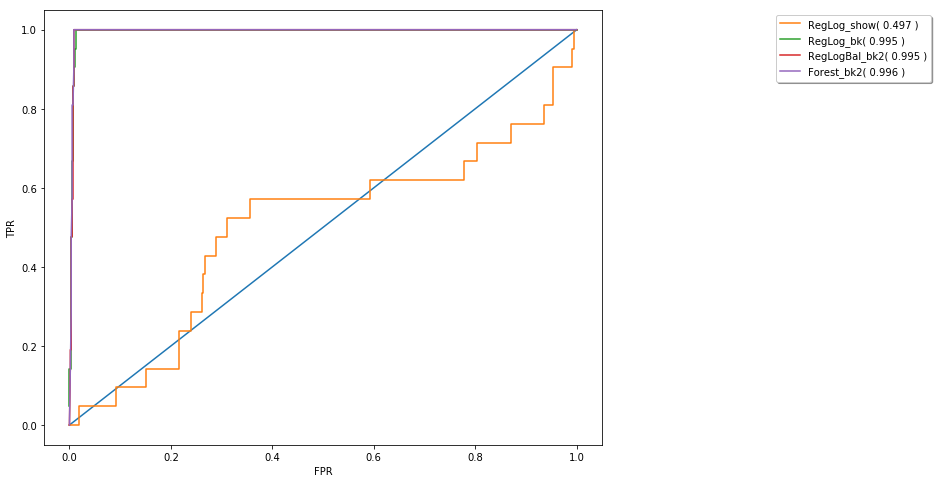

In [52]:
plt.figure(figsize=(10,8))
ax = plt.subplot(111)

# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')

for model in models :
    y_score=model.predict_proba(x_test)[:,1]
    fpr, tpr,_ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,tpr, label=model.name+ '( %0.3f' %(roc_auc) +' )')
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 1), shadow=True, ncol=1)

In [96]:
coef_df = pd.DataFrame()

for model in models :
    print(model.name)
    coef_list = model.coef_list
    if (len(coef_df) == 0) :
        coef_df = pd.DataFrame(coef_list)
    else :
        coef_df = pd.merge(coef_df, pd.DataFrame(coef_list), how='inner', on=0)
    coef_df.rename(columns={1:model.name}, inplace=True)
coef_df.rename(columns={0:'Feature'}, inplace=True)
coef_df.index=coef_df['Feature']
coef_df.drop('Feature', axis=1, inplace=True)
coef_df

RegLog_bk
RegLogBal_bk2
Forest_bk2
RegLog_show


,RegLog_bk,RegLogBal_bk2,Forest_bk2,RegLog_show
Feature,,,,
season2,0.384128,1.938860e-04,0.207885,0.426434
isdead_bk,0.255506,-5.340390e-05,0.001442,0.163174
season4,0.222838,1.258935e-04,0.018281,-0.170503
book3,0.204185,-3.009656e-04,0.000268,-0.065867
season3,0.195071,6.976962e-05,0.090617,0.253265
season1,0.192774,1.435268e-04,0.060574,-0.050747
book1,0.180592,-5.083699e-06,0.000305,-0.066168
book2,0.157875,-2.111814e-04,0.001056,0.194451
house_bk[T.OTHER],0.142272,-4.820886e-04,0.000000,0.096042


In [97]:
coef_df.describe()

,RegLog_bk,RegLogBal_bk2,Forest_bk2,RegLog_show
count,72.000000,72.000000,72.000000,72.000000
mean,0.033294,-0.000219,0.013889,0.000911
std,0.084230,0.004618,0.045200,0.250315
min,-0.109281,-0.025670,0.000000,-0.740916
25%,-0.013013,-0.000025,0.000000,-0.101211
50%,0.000442,-0.000005,0.000000,0.000000
75%,0.052028,0.000017,0.001476,0.163924
max,0.384128,0.013029,0.268074,0.461361


In [98]:
from sklearn.preprocessing import MinMaxScaler

norm_df = MinMaxScaler().fit_transform(coef_df)
norm_df = pd.DataFrame(norm_df, columns=coef_df.columns, index=coef_df.index)
norm_df.describe()

,RegLog_bk,RegLogBal_bk2,Forest_bk2,RegLog_show
count,72.000000,72.000000,72.000000,72.000000
mean,0.288960,0.657650,0.051810,0.617019
std,0.170710,0.119327,0.168608,0.208201
min,0.000000,0.000000,0.000000,0.000000
25%,0.195108,0.662687,0.000000,0.532078
50%,0.222377,0.663197,0.000000,0.616261
75%,0.326928,0.663758,0.005507,0.752605
max,1.000000,1.000000,1.000000,1.000000


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5,
        55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5,
        66.5, 67.5, 68.5, 69.5, 70.5, 71.5]),
 <a list of 72 Text xticklabel objects>)

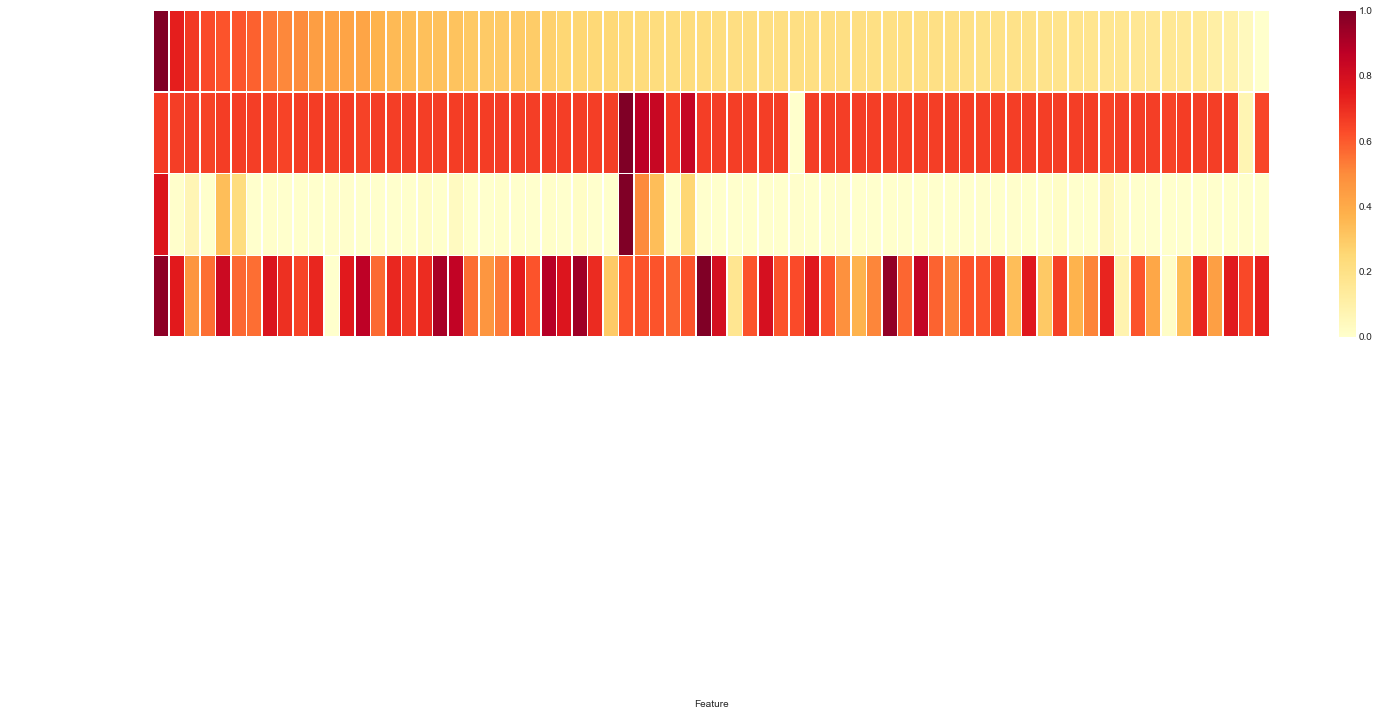

In [100]:
sns.set_style("dark")
fig = plt.figure(figsize=(25, 6))
#fig.patch.set_facecolor('xkcd:twilight blue')

#plt.subplots(figsize=(25, 6))
sns.heatmap(norm_df.T, annot=False, linewidths=.5, cmap='YlOrRd')
plt.yticks(rotation=0, color='white', size=20)
plt.xticks(rotation=270, color='white', size=15)